
```
Project by Ammar Owaineh
```

# Introduction

This project analyzes 8,523 items accross 12 columns to predict the expected sales of each outlet store based on the features provided in the data. The project starts by initial inspection of the dataset, then visualizing columns both seperately and in relation to each other, then it will move on to professionally handling any flaws in the data, and finally several prediction models will be trialed and tuned to attempt to get the best predicition results.





# Part 1 - Importing and initial inspection


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


*The data has 8,523 rows and 12 colums, of which 7 are categorical and 5 are numerical*

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

*The datatypes for each column are showsn above*

In [9]:
df.duplicated().sum()

0

*The data has no duplicates*

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

*The data has missing values in the Outlet_Size and Item_Weight columns that need to be replaced.*

In [11]:
#df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
#df.head()

*The data in the Outlet_Size column was replaced with the string 'MISSING' because it is an object.*

In [12]:
df['Item_Weight'].mean()

12.857645184135976

In [13]:
#df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
#df.head()

*The missing values in 'Item_Weight' column were replaced with the mean of the column because it is a float and because replacing it with a new value will skew the data.*

In [14]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

*All the missing values has been replaced with placeholders.*

In [15]:
df.value_counts('Outlet_Establishment_Year')

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1999     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [16]:
df.value_counts('Item_Identifier')

Item_Identifier
FDG33    10
FDW13    10
NCL31     9
FDX04     9
NCQ06     9
         ..
FDN52     1
FDC23     1
FDT35     1
DRF48     1
FDE52     1
Name: count, Length: 1559, dtype: int64

In [17]:
df.value_counts('Item_Type')

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [18]:
df.value_counts('Outlet_Identifier')

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [19]:
df.value_counts('Outlet_Size')

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [20]:
df.value_counts('Outlet_Location_Type')

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [21]:
df.value_counts('Outlet_Type')

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [22]:
df.value_counts('Item_Visibility')

Item_Visibility
0.000000    526
0.076975      3
0.076856      2
0.107663      2
0.014048      2
           ... 
0.038729      1
0.038725      1
0.038722      1
0.038721      1
0.328391      1
Name: count, Length: 7880, dtype: int64

In [23]:
df.value_counts('Item_MRP')

Item_MRP
172.0422    7
188.1872    6
196.5084    6
170.5422    6
196.5768    6
           ..
117.1834    1
117.1492    1
117.1124    1
117.0492    1
143.5154    1
Name: count, Length: 5938, dtype: int64

In [24]:
df.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [25]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

*All columns were checked for inconsistent data. Inconsistent data was found and replaced in the 'Item_Fat_Content' column.*

In [26]:
item_visibility_mean = df['Item_Visibility'].mean().round(2)
item_visibility_min = df['Item_Visibility'].min()
item_visibility_max = df['Item_Visibility'].max()
print (f'The mean for Item Visibility column is {item_visibility_mean}')
print (f'The minimum for Item Visibility column is {item_visibility_min}')
print (f'The maximum for Item Visibility column is {item_visibility_max}')

The mean for Item Visibility column is 0.07
The minimum for Item Visibility column is 0.0
The maximum for Item Visibility column is 0.328390948


In [27]:
item_mrp_mean = df['Item_MRP'].mean().round(2)
item_mrp_min = df['Item_MRP'].min()
item_mrp_max = df['Item_MRP'].max()
print (f'The mean for Item Maximum Retail Price column is {item_mrp_mean}')
print (f'The minimum for Item Maximum Retail Price column is {item_mrp_min}')
print (f'The maximum for Item Maximum Retail Price column is {item_mrp_max}')



The mean for Item Maximum Retail Price column is 140.99
The minimum for Item Maximum Retail Price column is 31.29
The maximum for Item Maximum Retail Price column is 266.8884


In [28]:
item_outlet_sales_mean = df['Item_Outlet_Sales'].mean().round(2)
item_outlet_sales_min = df['Item_Outlet_Sales'].min()
item_outlet_sales_max = df['Item_Outlet_Sales'].max()
print (f'The mean for Item Outlet Sales column is {item_outlet_sales_mean}')
print (f'The minimum for Item Outlet Sales column is {item_outlet_sales_min}')
print (f'The maximum for Item Outlet Sales column is {item_outlet_sales_max}')


The mean for Item Outlet Sales column is 2181.29
The minimum for Item Outlet Sales column is 33.29
The maximum for Item Outlet Sales column is 13086.9648



*The mean, minimum value, and maximum value of each numerical column are detailed above.*

# Part 2 - Visualizing dataset            


*The following histogram plots will highlight the numerical columns in the dataset which are:*
* Item Weight       
* Item Visibility              
* Item Maximum Retail Price                    
* Item Outlet Sales

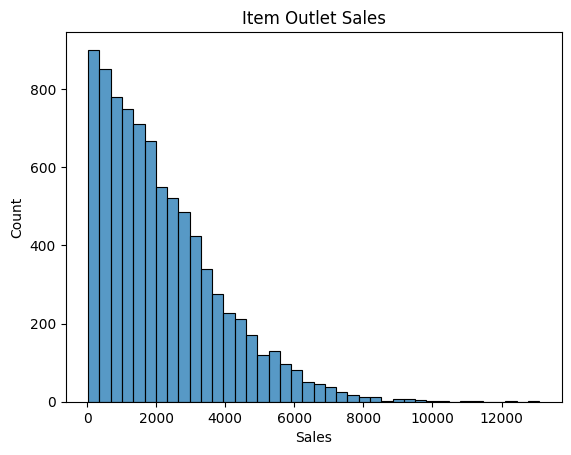

In [29]:
ax = sns.histplot(df['Item_Outlet_Sales'], bins = 40)
ax.set_title('Item Outlet Sales')
ax.set_xlabel('Sales')
plt.show()

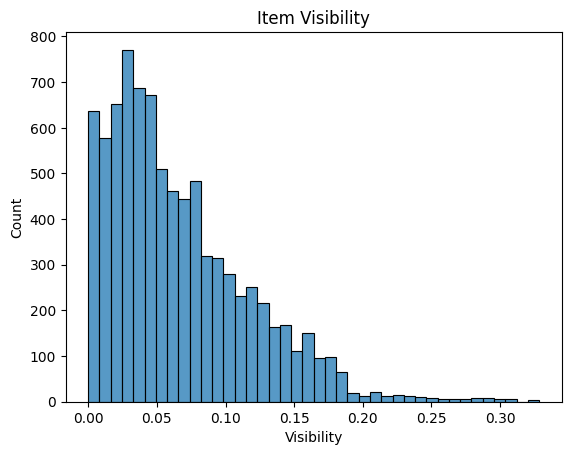

In [30]:
ax = sns.histplot(df['Item_Visibility'], bins = 40)
ax.set_title('Item Visibility')
ax.set_xlabel('Visibility')
plt.show()

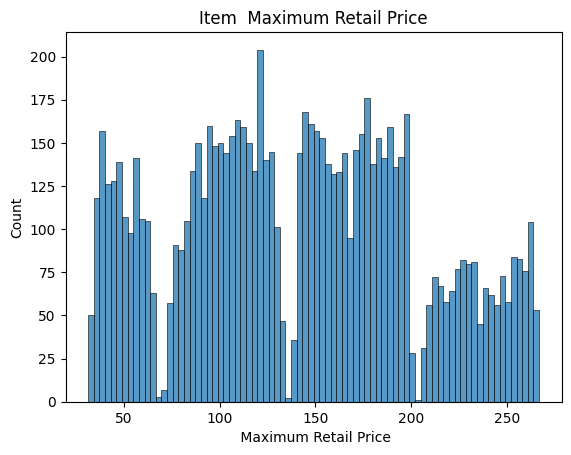

In [31]:
ax = sns.histplot(df['Item_MRP'], bins = 80)
ax.set_title('Item  Maximum Retail Price')
ax.set_xlabel(' Maximum Retail Price')
plt.show()

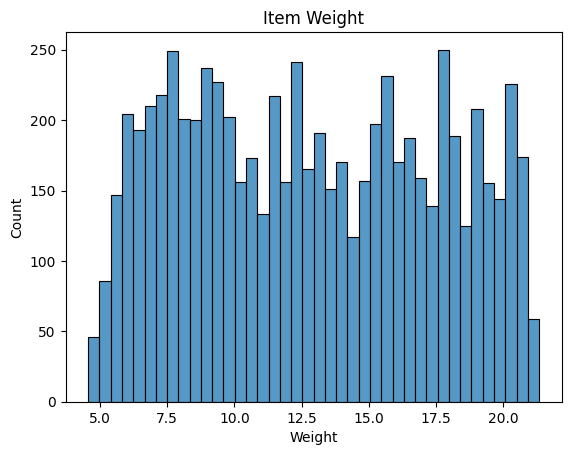

In [32]:
ax = sns.histplot(df['Item_Weight'], bins = 40)
ax.set_title('Item Weight')
ax.set_xlabel('Weight')
plt.show()

*The following boxplots will highlight the numerical columns in the dataset which are:*
* Item Weight       
* Item Visibility              
* Item Maximum Retail Price                    
* Item Outlet Sales
            

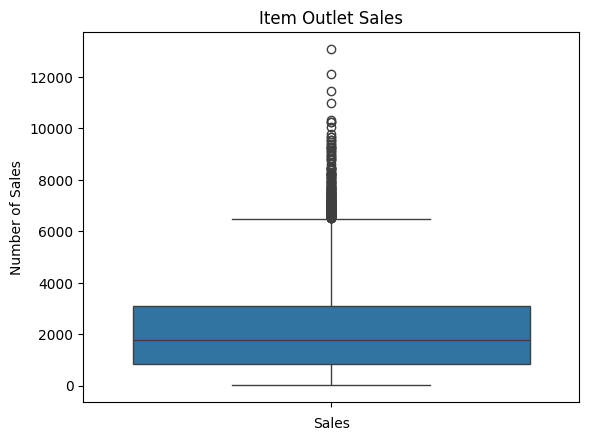

In [33]:
ax =sns.boxplot(df['Item_Outlet_Sales'])
ax.set_title('Item Outlet Sales')
ax.set_xlabel('Sales')
ax.set_ylabel('Number of Sales')
plt.show()

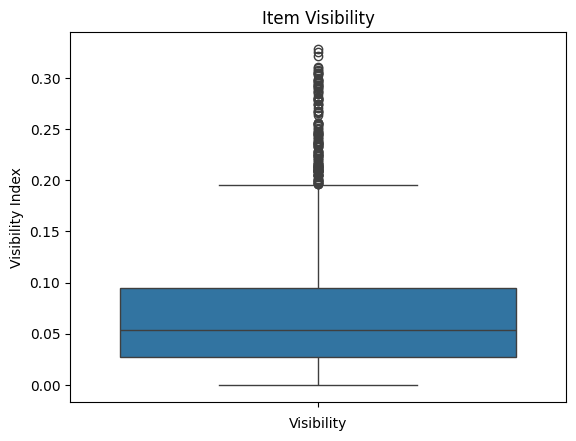

In [34]:
ax =sns.boxplot(df['Item_Visibility'])
ax.set_title('Item Visibility')
ax.set_xlabel('Visibility')
ax.set_ylabel('Visibility Index')
plt.show()

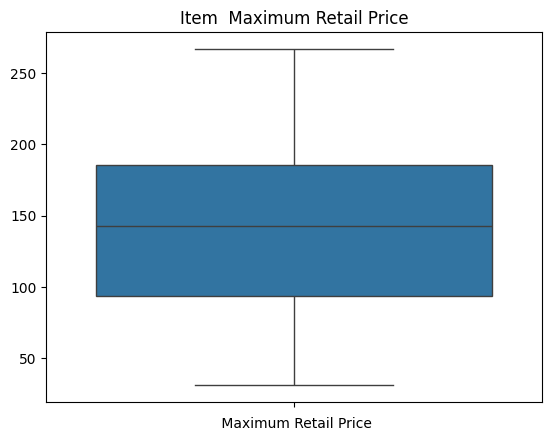

In [35]:
ax = sns.boxplot(df['Item_MRP'])
ax.set_title('Item  Maximum Retail Price')
ax.set_xlabel(' Maximum Retail Price')
ax.set_ylabel('')
plt.show()

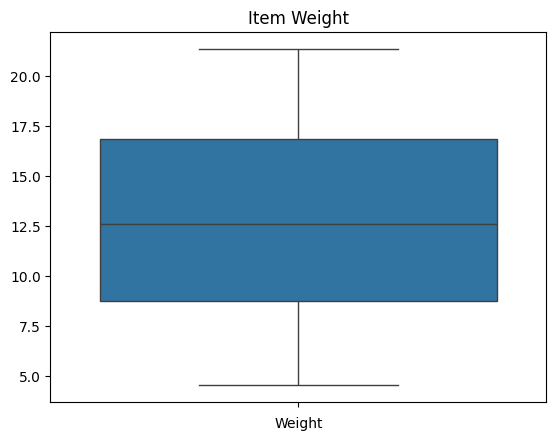

In [36]:
ax = sns.boxplot(df['Item_Weight'])
ax.set_title('Item Weight')
ax.set_xlabel('Weight')
ax.set_ylabel('')
plt.show()

*The following plots will illustrate the number of values in each categorical column, which are:*
* Item Fat Content
* Item Type              
* Outlet Identifier     
* Outlet Establishment Year   
* Outlet Size                
* Outlet Location Type       
* Outlet Type                


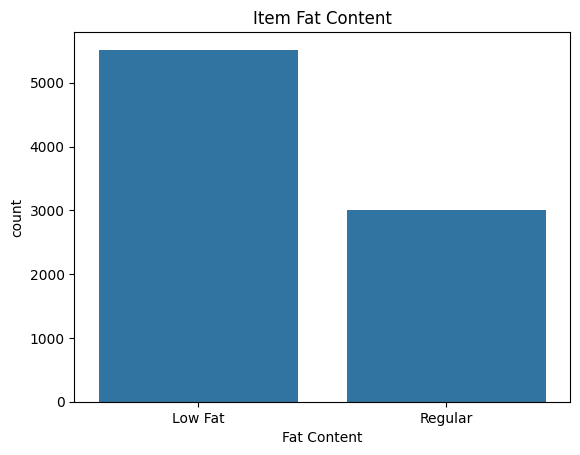

In [37]:
ax =sns.countplot(x = 'Item_Fat_Content', data = df)
ax.set_title('Item Fat Content')
ax.set_xlabel('Fat Content')
plt.show()

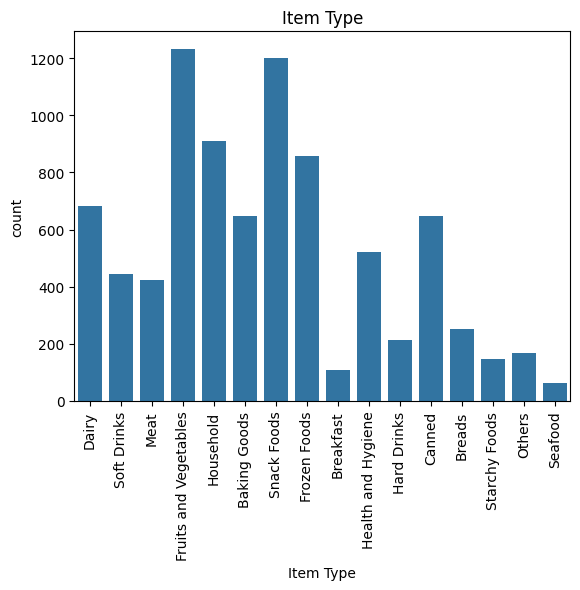

In [38]:
ax =sns.countplot(x = 'Item_Type', data = df)
ax.set_title('Item Type')
ax.set_xlabel('Item Type');
plt.xticks(rotation = 90);

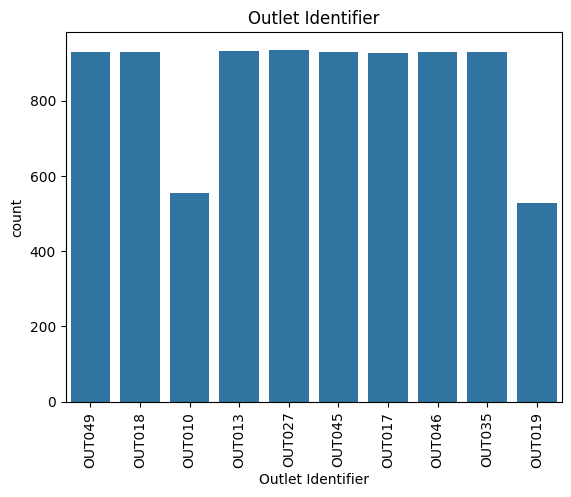

In [39]:
ax =sns.countplot(x = 'Outlet_Identifier', data = df)
ax.set_title('Outlet Identifier')
ax.set_xlabel('Outlet Identifier');
plt.xticks(rotation = 90);

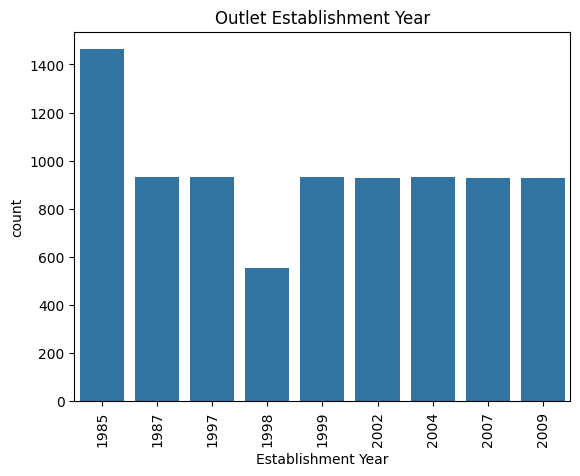

In [40]:
ax =sns.countplot(x = 'Outlet_Establishment_Year', data = df)
ax.set_title('Outlet Establishment Year')
ax.set_xlabel('Establishment Year');
plt.xticks(rotation = 90);

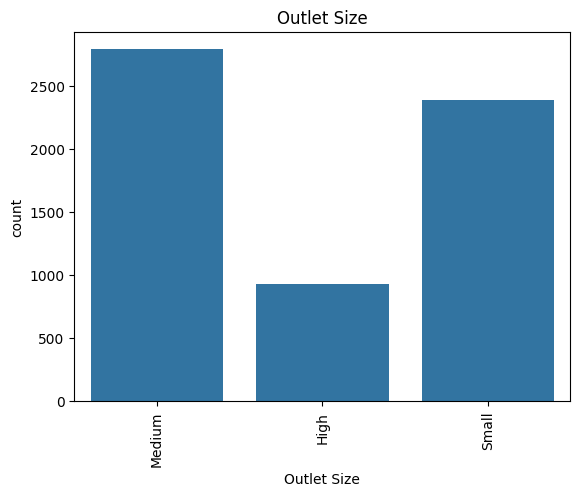

In [41]:
df_nonmissing = df[df['Outlet_Size'] != 'MISSING']
ax =sns.countplot(x = 'Outlet_Size', data = df_nonmissing)
ax.set_title('Outlet Size')
ax.set_xlabel('Outlet Size');
plt.xticks(rotation = 90);

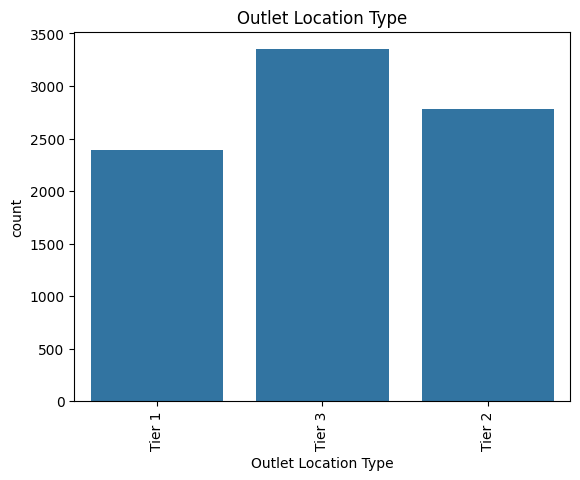

In [42]:
ax =sns.countplot(x = 'Outlet_Location_Type', data = df)
ax.set_title('Outlet Location Type')
ax.set_xlabel('Outlet Location Type');
plt.xticks(rotation = 90);

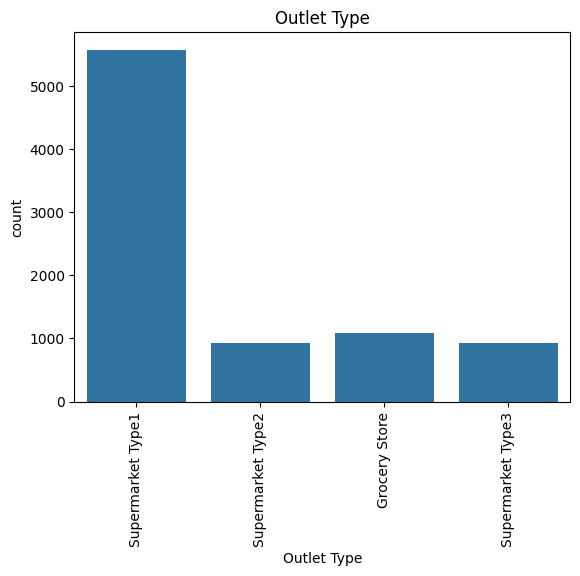

In [43]:
ax =sns.countplot(x = 'Outlet_Type', data = df)
ax.set_title('Outlet Type')
ax.set_xlabel('Outlet Type');
plt.xticks(rotation = 90);

*The following heatmap shows the correlation between numerical columns of the dataset.*

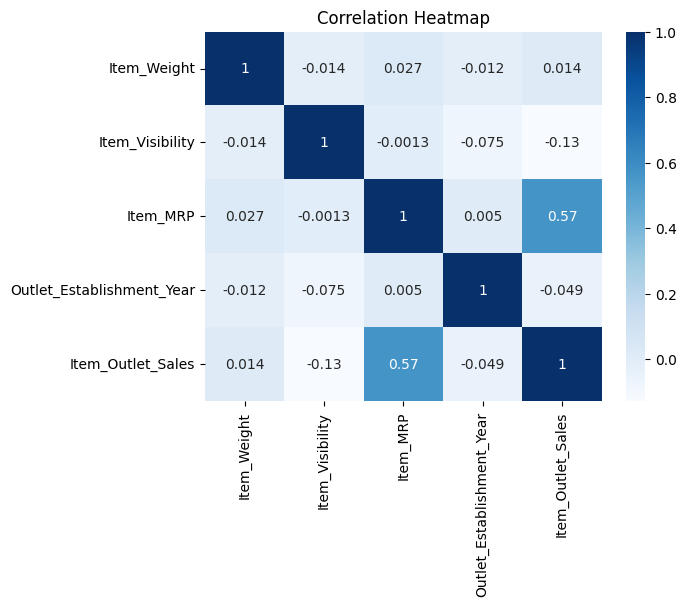

In [44]:
corr= df.corr(numeric_only=True)
ax = sns.heatmap(corr, annot=True, cmap = 'Blues')
ax.set_title('Correlation Heatmap');


*The heatmap shows low correlation levels between all columns except between the maximum retail price and outlet sale numbers, which have moderate correlation.*

# Part 3 - Plotting feature relations

*In this section functions to explore the features of the dataset will be defined and then applied to examine relations between the features of the dataset and the desired column to predict, which is the Item Outlet Sales column.*

In [45]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [46]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [47]:
# Final version of function
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [48]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

In [49]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

In [50]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<ipython-input-46-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


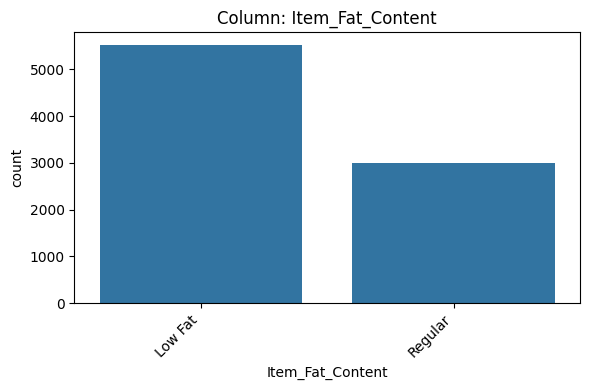

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [51]:
explore_categorical(df, 'Item_Fat_Content');

* The feature is categorical.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-46-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


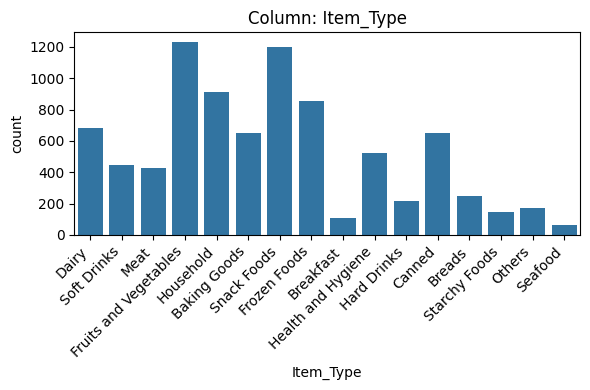

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [52]:
explore_categorical(df, 'Item_Type');

* The feature is categorical.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-46-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


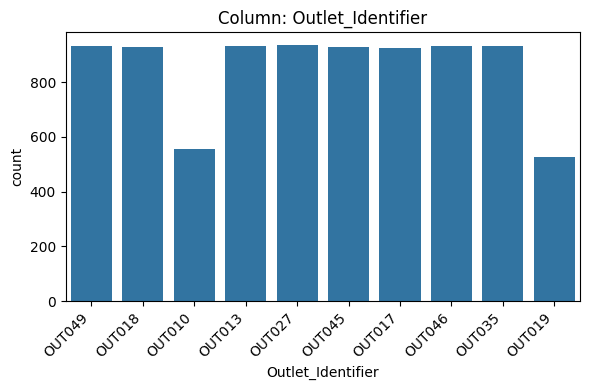

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [53]:
explore_categorical(df, 'Outlet_Identifier');

* The feature is categorical.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-46-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


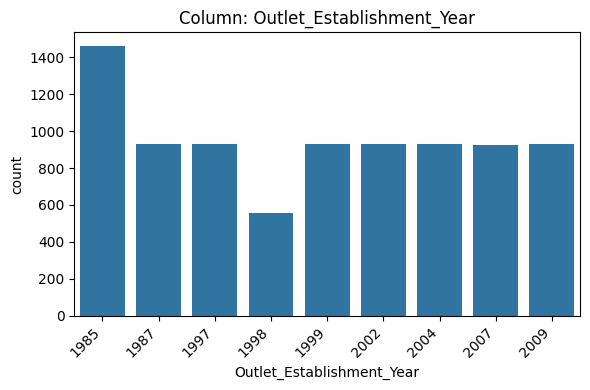

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [54]:
explore_categorical(df, 'Outlet_Establishment_Year');

* The feature is categorical.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-46-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


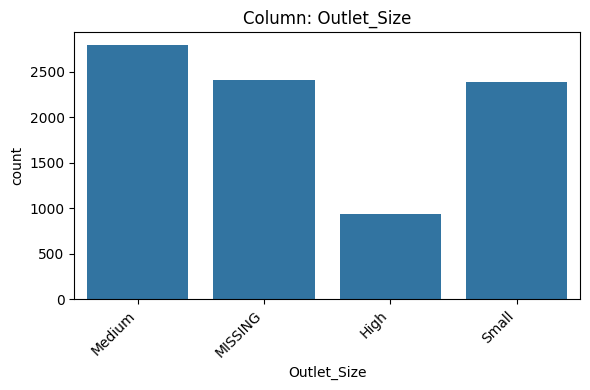

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [55]:
explore_categorical(df, 'Outlet_Size');

* The feature is ordinal.
* The feature has 2410 28.28% NaN values. - NaN values were replaced with the placeholder 'Missing'.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-46-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


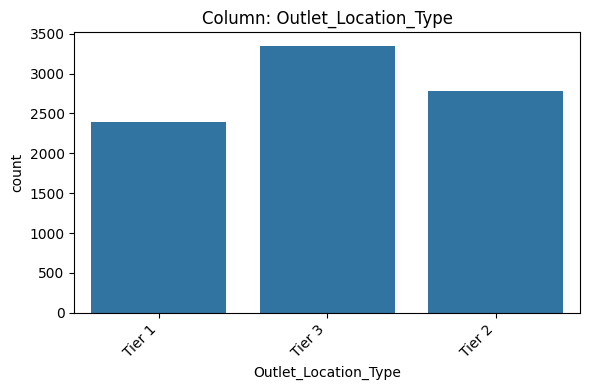

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [56]:
explore_categorical(df, 'Outlet_Location_Type');

* The feature is ordinal.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-46-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


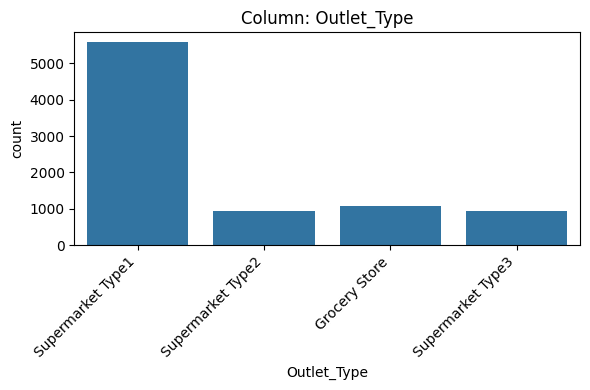

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [57]:
explore_categorical(df, 'Outlet_Type');

* The feature is categorical.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

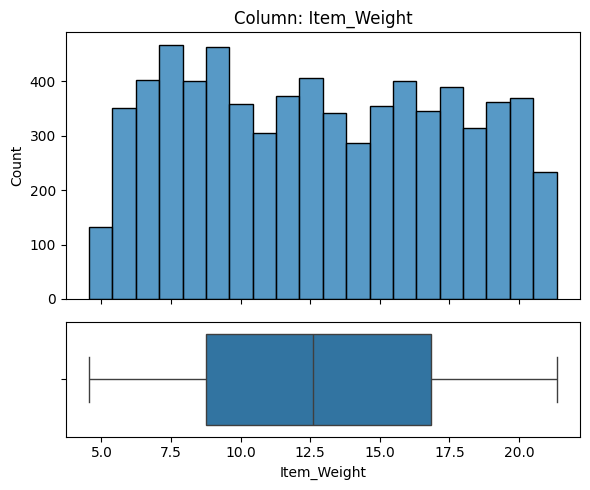

- NaN's Found: 1463 (17.17%)


In [58]:
explore_numeric(df, 'Item_Weight');

In [59]:
df_copy = df.copy()
df_copy['Item_Weight'] = df_copy['Item_Weight'].fillna(df_copy['Item_Weight'].mean())

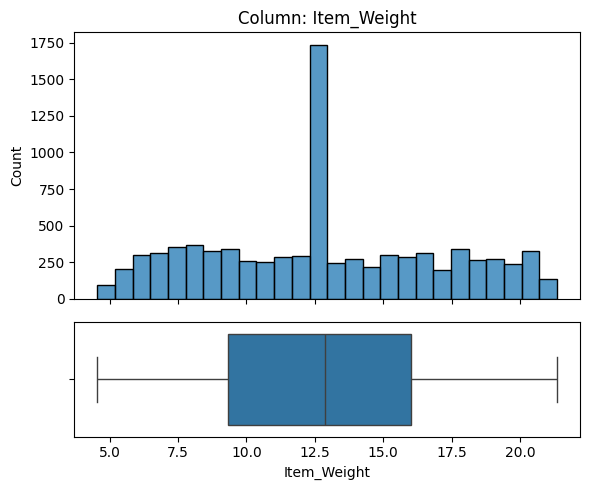

- NaN's Found: 0 (0.0%)


In [60]:
explore_numeric(df_copy, 'Item_Weight');

* The feature is numeric.
* The feature has 1463 NaN values (17.7%), the missing values were replaced with the mean of the item weight column.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There feature can be excluded business case/understanding reason because of the high number of missing values, which lead to skewing the data after being replaced by the mean.

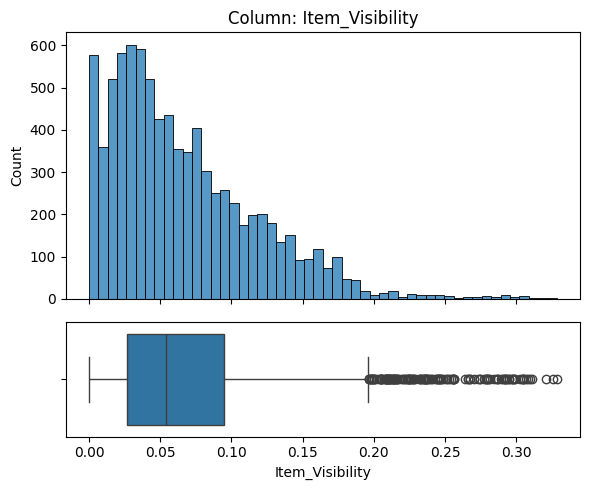

- NaN's Found: 0 (0.0%)


In [61]:
explore_numeric(df, 'Item_Visibility');

* The feature is numeric.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

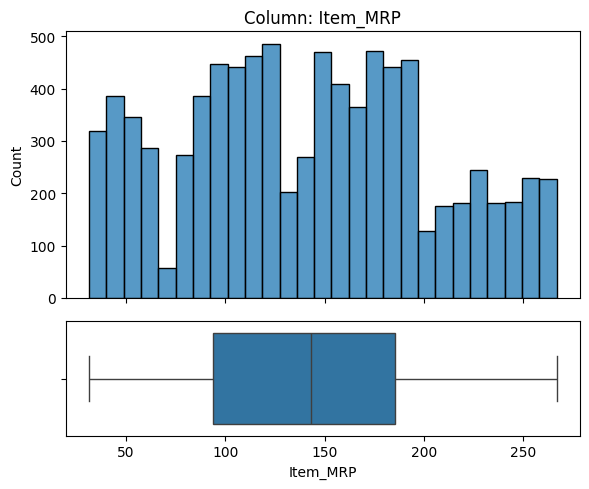

- NaN's Found: 0 (0.0%)


In [62]:
explore_numeric(df, 'Item_MRP');

* The feature is numeric.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

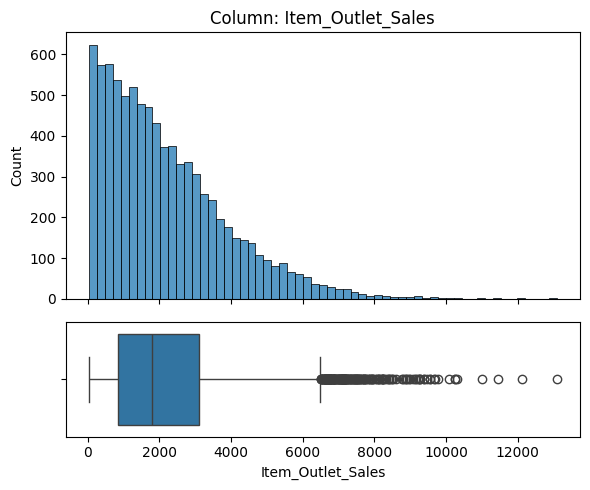

- NaN's Found: 0 (0.0%)


In [63]:
explore_numeric(df, 'Item_Outlet_Sales');

* The feature is numeric.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target because it is the target vector.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-46-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


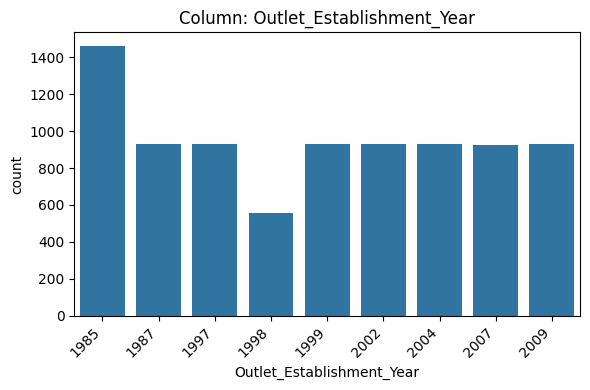

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [64]:
explore_categorical(df, 'Outlet_Establishment_Year');

* The feature is ordinal.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

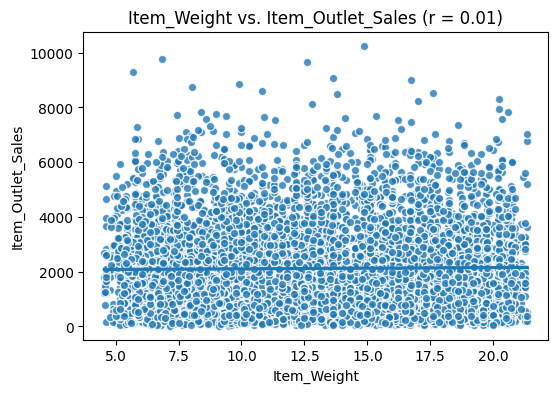

In [65]:
x= 'Item_Weight'
plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4));

* This feature does not seem very helpful for predicting the target, as it does not seem to be correlated with the item outlet sales.
* This feature is not a predictor for the target.

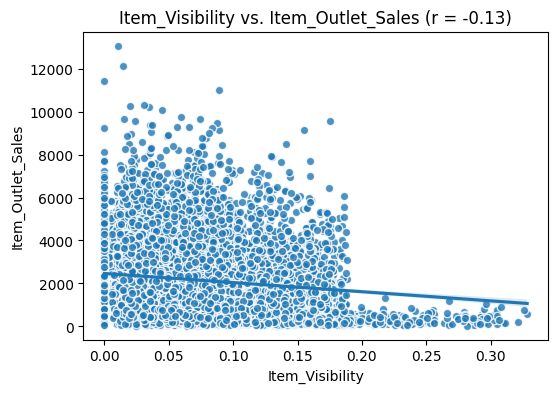

In [66]:
x= 'Item_Visibility'
plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4));

* This feature is helpful for predicting the target, as it correlates negatively ith the item outlet sales.
* This feature can be a minor predictor for the target.

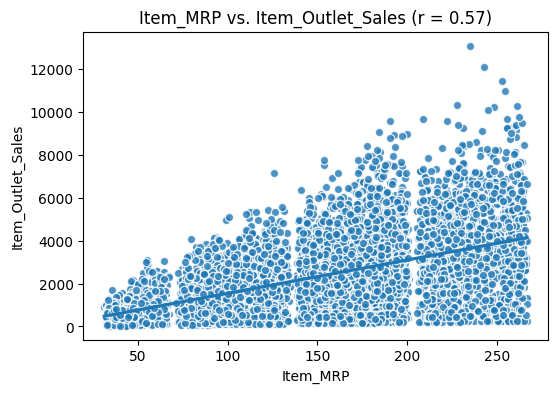

In [67]:
x= 'Item_MRP'
plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4));

* This feature is helpful for predicting the target, as it has moderate positive correlation with the target item outlet sales column.
* This feature can be a significant predictor for the target.

<ipython-input-47-66c32b3ad1fa>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


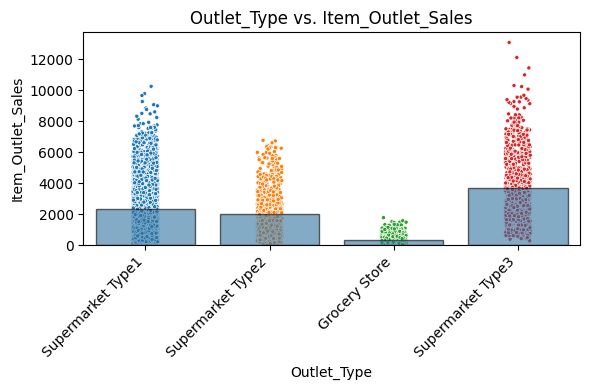

In [68]:
x= 'Outlet_Type'
plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),fillna = True);

* This feature is helpful for predicting the target, as it shows that grocery stores have notably lower outlet sales than supermarkets.
* This feature can be a useful predictor for the target.

In [69]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [70]:
df['Item_Identifier'].nunique()
df = df.set_index('Item_Identifier')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


*The Item Identifier column was set as the index since it has %100 unique values that identify each value in each row.*
*The Item Identifier column is not useful for prediction because it has %100 unique values that does not affect the Item outlet sales.

<ipython-input-47-66c32b3ad1fa>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


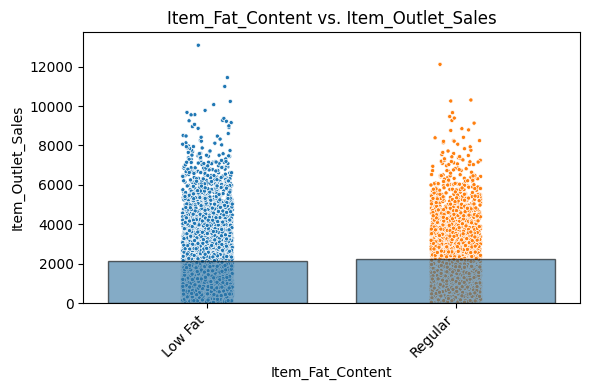

In [71]:
x= 'Item_Fat_Content'
plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),fillna = True);

* This feature is not helfupl for predicting the target, as the two types of fat content have similar sale numbers.
* This feature is not a useful predictor for the target.

<ipython-input-47-66c32b3ad1fa>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


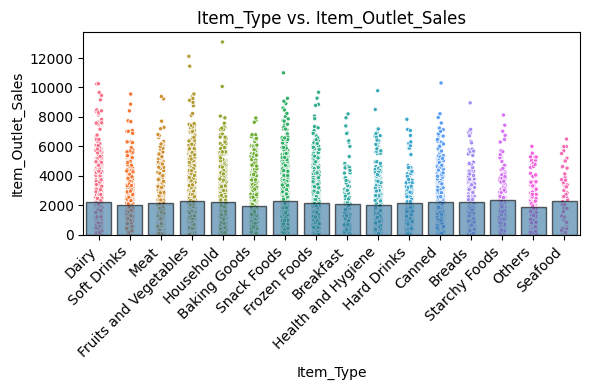

In [72]:
x= 'Item_Type'
plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),fillna = True);

* This feature is not helfupl for predicting the target, as the types of items have sale numbers within the same range.
* This feature is not a useful predictor for the target.

<ipython-input-47-66c32b3ad1fa>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


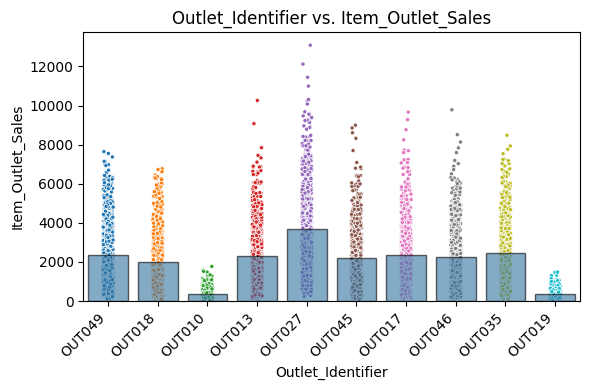

In [73]:
x= 'Outlet_Identifier'
plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),fillna = True);

* This feature is  helfupl for predicting the target, as there are outlet types that have lower outlet sale numbers, with some having above average sales.
* This feature is a useful predictor for the target.

<ipython-input-47-66c32b3ad1fa>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


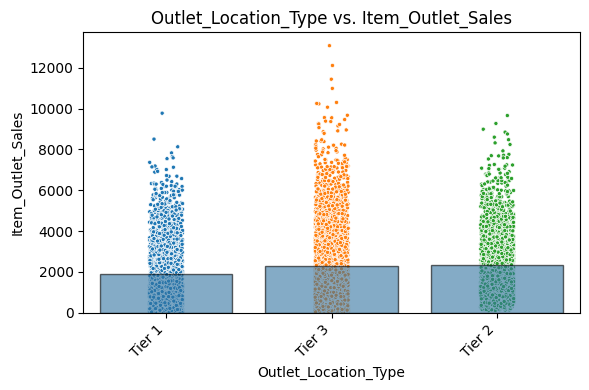

In [74]:
x= 'Outlet_Location_Type'
plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),fillna = True);

* This feature is not helfupl for predicting the target, as there are no significant difference between the outlet types and sales.
* This feature is not a very useful predictor for the target.

<ipython-input-47-66c32b3ad1fa>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


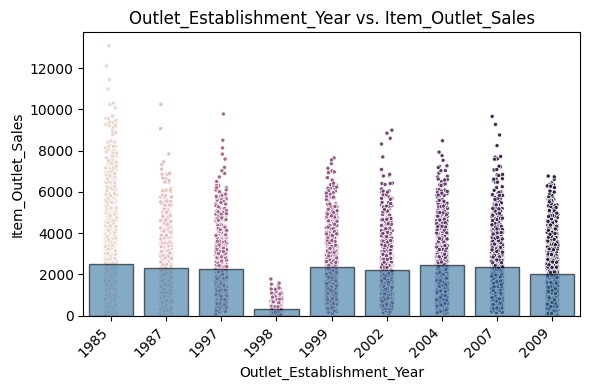

In [75]:
x= 'Outlet_Establishment_Year'
plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),fillna = True);

In [76]:
df['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

* This feature is overall not very helpful for prediction, because there is a smiliar pattern of sales for outlets regardless of establishment year with the exception of 1998. However, this exception could be due to the lower number of outlets established in that year, which has only about %55 of the average of outlets established in other years.
* This feature is a not a useful predictor for the target.

# Part 4 - Data Preprocessing

In this section, the data clean-up process will be done again, this time using scikit learn tools to impute missing data, encode data, and scale it.

*The first step of this section is to import the additional libraries needed for preprocessing the data.*

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df2 = pd.read_csv(fpath)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


*The next step is to do an initial cleaning of the whole data before splitting, by removing the unneccesary columns, and correcting any inconsistencies.*

In [80]:
df2.duplicated().sum()

0

In [81]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [82]:
df2["Outlet_Establishment_Year"] = df2["Outlet_Establishment_Year"].astype(str)

In [83]:
df2 = df2.drop(columns=['Item_Identifier'])

In [84]:
df2_cat = df2.select_dtypes('object')
df2_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,1998,NaN,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


In [85]:
for v in df2_cat:
    printed_info = df2[v].value_counts()
    print('Value counts for: ', printed_info)
    print('\n')

Value counts for:  Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value counts for:  Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value counts for:  Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64


Value counts for:  Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002

In [86]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df2['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

*After dropping the unnecessary column, one other column was converted, and the values of another column were replaced to ensure consistency.*

### Splitting the data

In [87]:
X = df2.drop(columns=['Item_Outlet_Sales'])
y = df2['Item_Outlet_Sales']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


### Preprocessing, fitting and transforming columns

*The next step is to create the pipelines needed for each type of the columns, by imputing missing data, scaling numeric and ordinal columns, and using an encoder on categorical columns.*

In [89]:
num_cols = X_train.select_dtypes("number").columns
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(impute_mean, scaler)
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object'))

In [90]:
ord_cols = ['Outlet_Size','Outlet_Location_Type']
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
qual_cond_order = ['NA','Small','Medium', 'High']
qual_cond_order2 = ['NA','Tier 1', 'Tier 2', 'Tier 3']
ordinal_category_orders = [qual_cond_order, qual_cond_order2]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
scaler_ord = StandardScaler()
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', 'Small', 'Medium', 'High'],
                                             ['NA', 'Tier 1', 'Tier 2',
                                              'Tier 3']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size', 'Outlet_Location_Type'])

In [91]:
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown= 'ignore')
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Type'],
       dtype='object'))

*The final step is to use a columntransformer, fit the chages to the training data, and then transforming both the training and test data.*

In [92]:
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [93]:
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Sma...
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [94]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,0.748125,1.084948,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,0.748125,1.084948,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.748125,-1.384777,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,-0.264370,-0.149914,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,-1.276865,-0.149914,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Part 5 - Creating prediction models

*We start this section of the project by using the preprocessed data from the previous section, and importing any needed libraries.*

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


*Then, a function for evaluating the model is defined.*

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

### Linear Regression

In [97]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [98]:
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [99]:
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.108
- MSE = 1,297,559.467
- RMSE = 1,139.105
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.105
- MSE = 1,194,323.980
- RMSE = 1,092.851
- R^2 = 0.567


*The evaluation of the model shows that R-squared values for both the training and test data are low and not sufficiently accurate for predictions.*

### Random Forest

In [100]:
rf = RandomForestRegressor(random_state = 42)
rf_pipe = make_pipeline(col_transformer, rf)

In [101]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',...
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [102]:
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.340
- MSE = 182,755.892
- RMSE = 427.500
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 765.692
- MSE = 1,216,133.211
- RMSE = 1,102.784
- R^2 = 0.559


*The model performed significantly better in terms of R-squared on the training data compare to the test data, which indicates a high level of overfitting.*


### Comparing Models

In [103]:
print ('Linear Regression Model:')
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test)
print('\n')
print ('Random Forest Regression Model:')
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)



Linear Regression Model:
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.108
- MSE = 1,297,559.467
- RMSE = 1,139.105
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.105
- MSE = 1,194,323.980
- RMSE = 1,092.851
- R^2 = 0.567


Random Forest Regression Model:
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.340
- MSE = 182,755.892
- RMSE = 427.500
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 765.692
- MSE = 1,216,133.211
- RMSE = 1,102.784
- R^2 = 0.559


*When comparing both models, it shows that both models default hyperparamets peformed poorly, with signifcant overfitting on the Random Forest model and underfitting on the Linear Regression model.*

### Tuning Hyperparamets

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['NA',
                                                            

In [106]:
rf_params = {'randomforestregressor__max_depth': [None,5,10,15],
          'randomforestregressor__n_estimators':[10,50,100,150],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__max_samples': [None,5, 10, 15, 20,]}

In [107]:
gridsearch_rf = GridSearchCV(rf_pipe, rf_params, n_jobs=-1, cv = 3, verbose=1)


In [108]:
gridsearch_rf.fit(X_train, y_train)


Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='NA',
                                                                                                        strategy='co...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 5, 10, 15],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__max_samples': [None, 5, 10, 15,
                                                                20],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 50, 100,
                                                                 150]},
             verbose=1)

In [109]:
gridsearch_rf.best_params_


{'randomforestregressor__max_depth': 5,
 'randomforestregressor__max_features': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__n_estimators': 100}

In [110]:
best_rf = gridsearch_rf.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 755.340
- MSE = 1,152,564.738
- RMSE = 1,073.576
- R^2 = 0.611

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 728.412
- MSE = 1,096,290.349
- RMSE = 1,047.039
- R^2 = 0.603


In [111]:
print(f'Default Random Forest model results:')
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)
print('\n')
print(f'Tuned Random Forest model results:')
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)



Default Random Forest model results:
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.340
- MSE = 182,755.892
- RMSE = 427.500
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 765.692
- MSE = 1,216,133.211
- RMSE = 1,102.784
- R^2 = 0.559


Tuned Random Forest model results:
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 755.340
- MSE = 1,152,564.738
- RMSE = 1,073.576
- R^2 = 0.611

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 728.412
- MSE = 1,096,290.349
- RMSE = 1,047.039
- R^2 = 0.603


*Comparing the default Random Forest model with its counterpart with tuned hyperparameters shows that tuning hyperparameters have helped overcome the overfitting issue, but despite this, the model is still underperforming. However, the tuning has done as expected and slightly improved the results, but since the improvement was insufficient, this suggests that another model may be needed.*

### Conclusions and Recommendations

In [112]:
y.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

* The various models used in their default and tuned iterations have not performed excellently. However, the best model to use from the options available is the Random Forest model with tuned hyperparameter, as it is the only model that does not result in overfitting.
* The R-squared metric of the best chosen model is 0.611 on the training data and 0.603 on the test data. This means that the model can predict results with approximately %60 accuracy.
* When looking at the mean absolute error of the model's training and test data, we can see an absolute error averge of about 750, which is a large error margain considering the average of the target column (Item outlet sales) is 2181. However, it still remains the best model of the options available, as the Linear Regression model has absolute error averge of over 800 and the default Random Forest model has absolute error averge of approximately 765 on the test data. *This metric is significant when looking at ther performance of the model, since it gives the number of discripency in item sales perdicted for each outlet when using the model to predict. It gives an insight on how the model will perform in predictions in terms of actual sales compared to predicted sales.*
* In the selected model, both the training and test data return close values in all metrics, which indicates that there is no overfitting. However, the performance of the model is still underpar, which indicates underfitting of the data.